In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

You can Download the File Directly from the Kaggle - "https://www.kaggle.com/datasets/omkargurav/face-mask-dataset",

else You can Download it by using the code I am giving below( make sure it will work only in Colab)

In [1]:
""" 
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

"""

' \n# configuring the path of Kaggle.json file\n!mkdir -p ~/.kaggle\n!cp kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n\n# API to fetch the dataset from Kaggle\n!kaggle datasets download -d omkargurav/face-mask-dataset\n\n'

In [2]:
with_mask_file = os.listdir(r'D:\Visual Studio Code\ML\DataSet\Mask_Dataset\with_mask')
without_mask_file =os.listdir(r'D:\Visual Studio Code\ML\DataSet\Mask_Dataset\without_mask')


In [3]:
print(f"Number of Mask Image: {len(with_mask_file)}\nNumber of With-out Mask Image: {len(without_mask_file)}")

Number of Mask Image: 3725
Number of With-out Mask Image: 3828


Creating the Label for two class of image

with mask --> 1

without mask --> 0

In [4]:
#Create the Labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [5]:
labels = with_mask_labels + without_mask_labels
print(len(labels))

7553


# Displaying the Image 

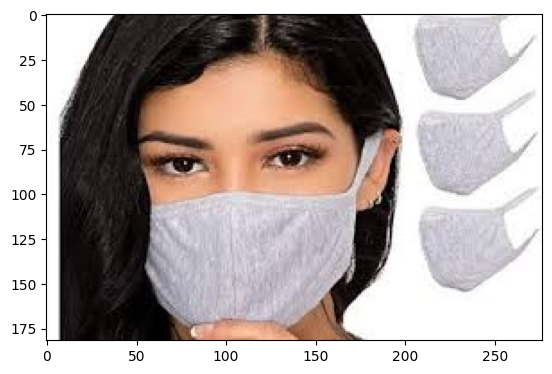

In [9]:
#We gonna display with mask image 

img =mpimg.imread(r'D:\Visual Studio Code\ML\DataSet\Mask_Dataset\with_mask\with_mask_3717.jpg')
plt.imshow(img)
plt.show()

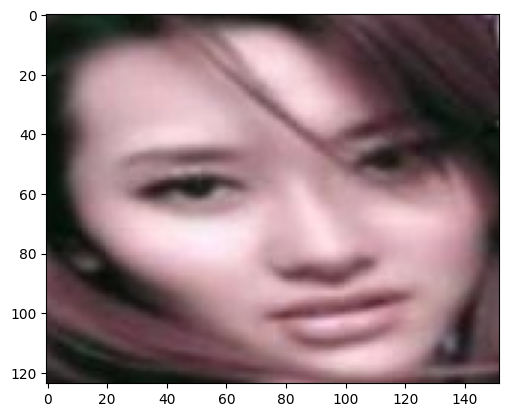

In [10]:
#Showing image without mask
img =mpimg.imread(r'D:\Visual Studio Code\ML\DataSet\Mask_Dataset\without_mask\without_mask_3717.jpg')
plt.imshow(img)
plt.show()

# Image Processing


1. Resize The Image

2. Convert the Image into numpy

In [12]:
#Converting the data into numpy
with_mask_path = 'D:/Visual Studio Code/ML/DataSet/Mask_Dataset/with_mask/'
without_mask_path = 'D:/Visual Studio Code/ML/DataSet/Mask_Dataset/without_mask/'

data = []

#We first do the with mask process

for file_name in with_mask_file:
    img = Image.open(with_mask_path+file_name)
    img = img.resize((128,128))
    img = img.convert('RGB')
    img = np.array(img)

    data.append(img)

# We will now do the without mask process

for file_name in without_mask_file:
    img = Image.open(without_mask_path+file_name)
    img = img.resize((128,128))
    img = img.convert('RGB')
    img = np.array(img)

    data.append(img)


C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [13]:
len(data)

7553

In [14]:
#converting the img list and label list to numpy array

x = np.array(data)

y = np.array(labels)

In [15]:
print(type(x), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


# Spliting the data into training and testing data

In [17]:
x_train , x_test ,y_train,y_test = train_test_split(x,y,random_state=2,test_size=0.2)

In [18]:
# Scaling the data
x_train = x_train/255

x_test = x_test/255

# Building the Convolutional Neural Networks (CNN)

In [21]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers

In [23]:
num_of_class = 2


model = keras.Sequential()

model.add(layers.Conv2D(32,(3,3), activation ='relu' , input_shape=(128,129,3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation ='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation ='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))


model.add(layers.Dense(num_of_class,activation='sigmoid'))

C:\Users\Administrator\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
# Compile the Neural Network

model.compile(optimizer= 'adam', loss = 'sparse_categorical_crossentropy', metrics=['Acc'])

In [25]:
#Training the neural Network

history = model.fit(x_train , y_train, validation_split=0.1 , epochs= 10)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 32s 173ms/step - Acc: 0.7195 - loss: 0.5332 - val_Acc: 0.9107 - val_loss: 0.2346
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 30s 175ms/step - Acc: 0.8995 - loss: 0.2636 - val_Acc: 0.9025 - val_loss: 0.2511
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 180ms/step - Acc: 0.9136 - loss: 0.2248 - val_Acc: 0.9041 - val_loss: 0.2382
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 160ms/step - Acc: 0.9197 - loss: 0.1976 - val_Acc: 0.9273 - val_loss: 0.1872
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 157ms/step - Acc: 0.9375 - loss: 0.1783 - val_Acc: 0.9207 - val_loss: 0.1988
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 27s 156ms/step - Acc: 0.9488 - loss: 0.1343 - val_Acc: 0.9488 - val_loss: 0.1937
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 28s 167ms/step - Acc: 0.9592 - loss: 0.1107 - val_Acc: 0.9405 - val_loss: 0.1701
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 31s 183ms/step - Acc: 0.9653 - loss: 0.1010 - val_Acc: 0.9421 - val_loss: 0.1658
Epoch 9/10
170/170 ━━━━━━━━━━━━━

# Model Evaluation

In [26]:
test_loss , test_accuracy = model.evaluate(x_test,y_test)

48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - Acc: 0.9472 - loss: 0.1412


In [27]:
print("Test Data Accuracy: ",test_accuracy)

Test Data Accuracy:  0.9510257840156555


Accuracy Graph


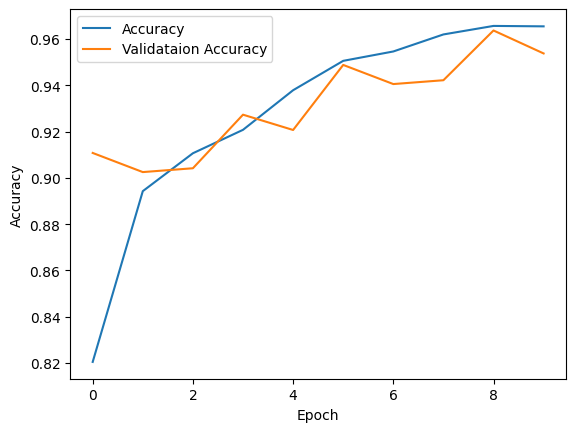

In [30]:
#Accuracy Model
print("Accuracy Graph")
plt.plot(history.history['Acc'],label="Accuracy")
plt.plot(history.history['val_Acc'], label = 'Validataion Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Loss Graph


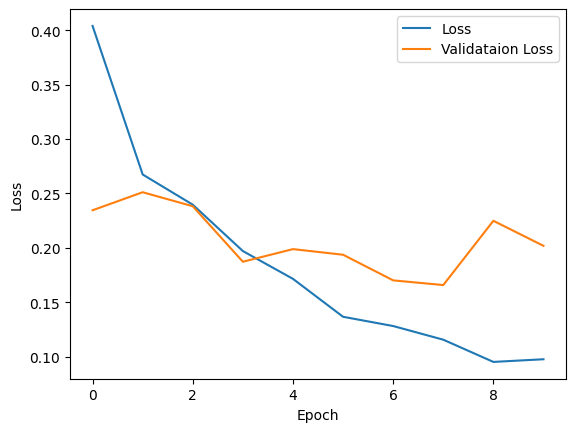

In [31]:
#Loss Model
print("Loss Graph")
plt.plot(history.history['loss'],label="Loss")
plt.plot(history.history['val_loss'], label = 'Validataion Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Prediction Model

In [36]:
input_img = r'D:\Visual Studio Code\ML\DataSet\Mask_Dataset\without_mask\without_mask_10.jpg'

img = Image.open(input_img)
img = img.resize((128,128))
img = img.convert('RGB')
img = np.array(img)
img = img/255

img = np.reshape(img , [1,128,128,3])
pred = model.predict(img)

actual_label = np.argmax(pred)

if actual_label == 0:
    print("The Person is not wearing a Mask")
else:
    print("The Person is wearing a Mask")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
The Person is without Mask


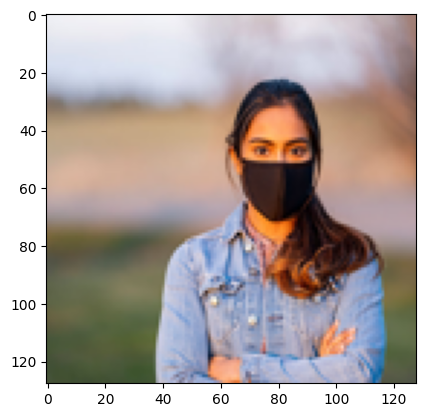

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The Person is with Mask


In [38]:
#Person with Mask

input_img = r'D:\Visual Studio Code\ML\Youtube_ML_Code\Mask Detection Model\Person_With_Mask.jpg'

img = Image.open(input_img)
img = img.resize((128,128))
img = img.convert('RGB')
img = np.array(img)
plt.imshow(img)
plt.show()
img = img/255

img = np.reshape(img , [1,128,128,3])
pred = model.predict(img)

actual_label = np.argmax(pred)

if actual_label == 0:
    print("The Person is without Mask")
else:
    print("The Person is with Mask")

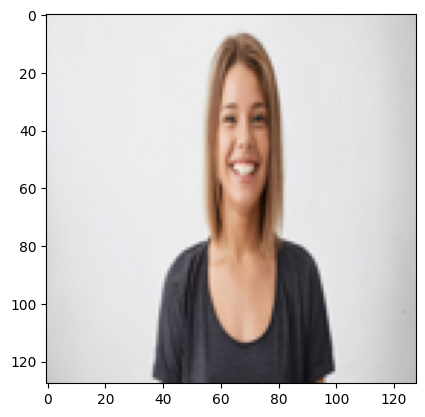

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
The Person is without Mask


In [41]:
#Person without Mask

input_img = r'D:\Visual Studio Code\ML\Youtube_ML_Code\Mask Detection Model\shutterstock_648907024.jpg'

img = Image.open(input_img)
img = img.resize((128,128))
img = img.convert('RGB')
img = np.array(img)
plt.imshow(img)
plt.show()
img = img/255

img = np.reshape(img , [1,128,128,3])
pred = model.predict(img)

actual_label = np.argmax(pred)

if actual_label == 0:
    print("The Person is without Mask")
else:
    print("The Person is with Mask")

# Saving the Model

In [42]:
import pickle

In [43]:
file_name = 'Mask_Detection_Model.sav'
pickle.dump(model,open(file_name,'wb'))